In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer

In [3]:
# Load Datasets
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

Train Shape: (1460, 81)
Test Shape: (1459, 74)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Count total entries
total = train_df.shape[0]

# Total missing values
missing = train_df.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0]

# Create a DataFrame with both count and percentage
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': (missing / total) * 100
}).sort_values(by='Missing %', ascending=False)

missing_df
missing_df[missing_df['Missing %'] > 40].index.tolist()

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [11]:
#Target and ID Columns
y = train_df["SalePrice"]
X = train_df.drop(["SalePrice", "Id",'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)

Distribution of Target Variable (SalePrice)

Text(0.5, 1.0, 'Distribution of Sale Price')

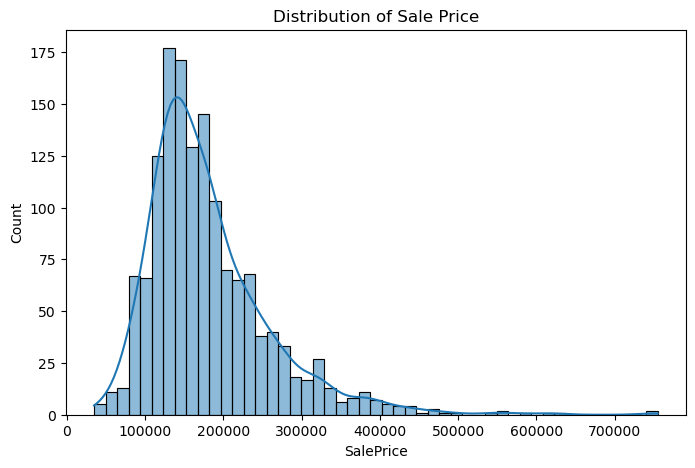

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')

Text(0.5, 1.0, 'Top Features Correlated with Sale Price')

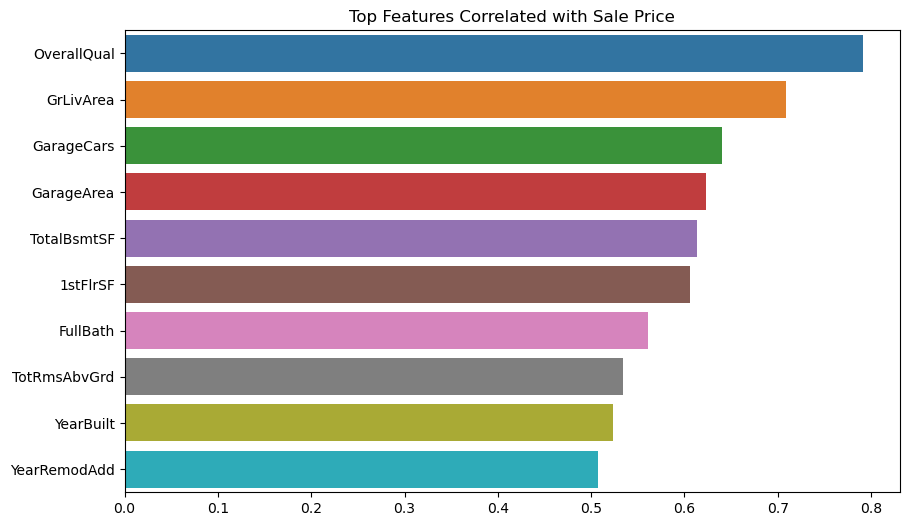

In [15]:
# Correlation matrix (top 10 with SalePrice)
corr = train_df.corr(numeric_only=True)
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top Features Correlated with Sale Price')

In [17]:
#Select Feature Types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Numerical features:", len(numerical_cols))
print("Categorical features:", len(categorical_cols))

Numerical features: 36
Categorical features: 38


In [18]:
#Preprocessing Pipelines
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)
])


In [19]:
#Full Modeling Pipeline Randomforest Regressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

#Train/Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Train the Model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual', ...])])),
                ('model', RandomForestRegressor(random_state=42))])

In [20]:
# Evaluate Model for Randomforest Regressor
y_pred = model_pipeline.predict(X_valid)

print("R2 Score:", r2_score(y_valid, y_pred))

print("RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))

print("MAE:", mean_absolute_error(y_valid, y_pred))


R2 Score: 0.8883736187720062
RMSE: 29261.07922388616
MAE: 17737.777397260274


#Full Modeling Pipeline for XGB

In [21]:
#Full Modeling Pipeline for XGB
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',XGBRegressor(
    n_estimators=200,    # Number of boosting rounds
    learning_rate=0.1,   # Step size shrinkage
    max_depth=5,         # Maximum tree depth
    subsample=1,         # Fraction of training samples
    colsample_bytree=1,  # Fraction of features
    objective='reg:squarederror'  # Loss function
)
    )
])

#Train/Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)
#Train the Model
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQual...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [22]:
# Evaluate Model for XGB
y_pred = model_pipeline.predict(X_valid)

print("R2 Score:", r2_score(y_valid, y_pred))

print("RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred)))

print("MAE:", mean_absolute_error(y_valid, y_pred))

R2 Score: 0.9142143829238123
RMSE: 25651.582151189075
MAE: 15898.310533497432


In [23]:
import pickle

# Save model_pipeline (which includes preprocessor + model)
with open("xgb_model_pipeline.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)


In [24]:

# Load model pipeline
with open("xgb_model_pipeline.pkl", "rb") as f:
    model_pipeline = pickle.load(f)

# Predict (example input must match the pipeline's feature names)
sample = X_valid.iloc[0:1]  # Or construct a new DataFrame with correct columns
prediction = model_pipeline.predict(sample)
print("Predicted Price:", prediction[0])

Predicted Price: 141667.38
